# Tensorflow 

- sebuah library open source populer untuk komputasi kompleks dan juga cocok untuk pengembangan ML berskala besar.
- TensorFlow akan mengeksekusinya secara efisien dengan kode C++ yang teroptimasi
- mampu membagi graf di atas menjadi beberapa bagian dan menjalankannya secara paralel menggunakan CPU dan GPU

![](https://dicodingacademy.blob.core.windows.net/academies/202004301951488e27959270ddba1304f1b44355c19a38.png)

## Keras Library

- dapat membuat sebuah model ML hanya dengan beberapa baris kode

![](https://dicodingacademy.blob.core.windows.net/academies/20200430223645db4ba4b40cd18a68e3f302826cde7704.png)

- Model sequential pada keras adalah tumpukan layer-layer, yang sama seperti pada sebuah MLP. 

![](https://dicodingacademy.blob.core.windows.net/academies/202004302237045fa6c778daf7e9e1e76de9fa3b1624f7.png)

## Latihan

In [20]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Fix Error: Initializing libiomp5.dylib, but found libiomp5.dylib already initialized
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [5]:
print(tf.__version__)

2.0.0


In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2020-05-10 20:18:50--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   956KB/s    in 2m 5s   

2020-05-10 20:20:55 (552 KB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [6]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [7]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [8]:
os.listdir('/tmp/images/val')

['messy', 'clean']

In [9]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')
 
# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')
 
# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')
 
# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [10]:
# Image data generator adalah sebuah fungsi yang sangat berguna 
# untuk mempersiapkan data latih dan data testing yang akan diberikan ke model.

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [11]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [12]:
# membuat arsitektur dari CNN dengan keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
# memanggil fungsi compile pada objek model, dan tentukan loss function serta optimizer.
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [14]:
! pip install --user pillow # if you dont have pillow

In [33]:
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Train for 25 steps, validate for 5 steps
Epoch 1/20
25/25 - 8s - loss: 0.6656 - accuracy: 0.6400 - val_loss: 0.6064 - val_accuracy: 0.5500
Epoch 2/20
25/25 - 8s - loss: 0.6658 - accuracy: 0.6400 - val_loss: 0.6149 - val_accuracy: 0.5500
Epoch 3/20
25/25 - 8s - loss: 0.6560 - accuracy: 0.6600 - val_loss: 0.5639 - val_accuracy: 0.6000
Epoch 4/20
25/25 - 8s - loss: 0.6827 - accuracy: 0.5900 - val_loss: 0.6982 - val_accuracy: 0.5000
Epoch 5/20
25/25 - 8s - loss: 0.6473 - accuracy: 0.6100 - val_loss: 0.6633 - val_accuracy: 0.7500
Epoch 6/20
25/25 - 8s - loss: 0.6778 - accuracy: 0.6400 - val_loss: 0.6793 - val_accuracy: 0.6000
Epoch 7/20
25/25 - 8s - loss: 0.6741 - accuracy: 0.5800 - val_loss: 0.6419 - val_accuracy: 0.6500
Epoch 8/20
25/25 - 8s - loss: 0.6009 - accuracy: 0.6700 - val_loss: 0.5485 - val_accuracy: 0.8000
Epoch 9/20
25/25 - 8s - loss: 0.6386 - accuracy: 0.6700 - val_loss: 0.5946 - val_accuracy: 0.8000
Epoch 10/20
25/25 - 9s - loss: 0.5027 - accuracy: 0.7900 - val_loss: 0.6324 -

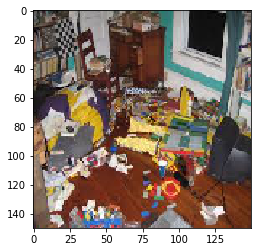

Result: messy


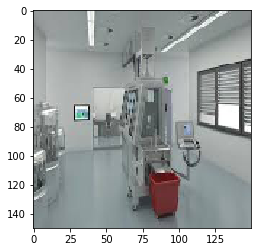

Result: clean


In [39]:
# check our model after training
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
# predicting images
paths = ['sample_data/messy_room.jpeg', 'sample_data/clean_room.jpeg']

for path in paths:
    img = image.load_img(path, target_size=(150,150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    
    plt.imshow(img)
    plt.show()
    
    if classes==0:
        print('Result: '+'clean')
    else:
        print('Result: '+'messy')

## Deployment of TensorFlow using TF serving

<https://medium.com/free-code-camp/how-to-deploy-tensorflow-models-to-production-using-tf-serving-4b4b78d41700>

## Adjustment and re-learning

- diperlukan karena model akan terus menemui lebih banyak data-data baru seiring waktu

### Manual Retraining

- melakukan ulang proses pelatihan model dari awal. 
- data-data baru yang ditemui di tahap produksi, akan digabung dengan data lama dan model dilatih ulang dari awal sekali menggunakan data lama dan data baru

### Continuous Learning

Alur Continuous Learning

1. Menyimpan data-data baru yang ditemui pada tahap produksi. Contohnya ketika sistem mendapatkan harga emas naik, data harga tersebut akan disimpan di database.
2. Ketika data-data baru yang dikumpulkan cukup, lakukan pengujian akurasi dari model terhadap data baru.
3. Jika akurasi model menurun seiring waktu, gunakan data baru, atau kombinasi data lama dan data baru untuk melatih dan men-deploy ulang model.